In [2]:
import sys
sys.path.append('/workspace/sy/sungyun/mdpi_IDS')

import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve, f1_score
import sklearn.metrics
from Utils import PklsFolder, make_cls_idx, split_train_val_test
from Layers import Flow_CLF
from tqdm import tqdm
from pathlib import Path 
import sys

In [3]:
#parameters
batch_size = 32
num_epoch = 100

num_layers = 2 # Byte_EncoderLayer 개수
d_model = 40
num_heads = 4
d_k = 10
d_v = 10
d_hid = (d_model * 2) #PositionwiseFeedForward hidden dim
add_attn_dim = (d_model * 2) # PacketEncoder attn_dim
pck_len = 350
num_classes = 2
dropout = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model_dir = './model'

#validation
model_path_list = sorted([x for x in Path(model_dir).glob('*_epoch_*.pt')], key = lambda x : int(x.stem.strip('model_epoch_')))
loss_history_path = './val_loss_history.npy'

In [5]:
flow_dataset = PklsFolder('../../../dataset/CICIDS2017/pkls')  # ISCX 2017 Dataset 

#validation

val_set_idx = np.load('val_set_idx.npy')
val_random_sampler = torch.utils.data.SubsetRandomSampler(val_set_idx)
val_dataloader = DataLoader(flow_dataset, batch_size = batch_size, shuffle = False,  sampler = val_random_sampler)

loss_history = []

In [5]:
#validation
for model_path in tqdm(model_path_list) :
    hit = 0
    all_preds = []
    all_labels = []
    score = []
    
    model =  Flow_CLF(num_layers, d_model,num_heads, d_k, d_v, d_hid, add_attn_dim, pck_len, device, num_classes = num_classes, dropout = dropout).to(device)
    model = torch.nn.DataParallel(model)
    model.load_state_dict(torch.load(model_path)['state'])
    criterion = nn.CrossEntropyLoss()
    
    model.eval()
    
    with torch.no_grad():
        val_loss = 0
        for (val_x, val_y) in val_dataloader:
            preds = model(val_x.type(torch.long).to(device))
            score.append(preds[:,1])
            loss = criterion(preds, val_y.type(torch.long).to(device))
            val_loss += loss.item()
            hit += ((preds.argmax(dim=1) == val_y.type(torch.long).to(device)).sum().item())

            all_preds.append(preds.argmax(dim=1))
            all_labels.append(val_y)

    loss_history.append(val_loss)
    accuracy = 100 * (hit/len(val_random_sampler))
    print(f'accuracy : {accuracy:.4f}')
    print(f'val loss : {val_loss}')

    del model

np.save(loss_history_path, np.array(loss_history))

  0%|          | 0/112 [00:00<?, ?it/s]/workspace/sy/sungyun/mdpi_IDS/Layers.py:128: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_score = self.softmax(attn2).unsqueeze(-1)
  1%|          | 1/112 [03:33<6:35:50, 213.97s/it]

accuracy : 70.2550
val loss : 876.1990715563297


  2%|▏         | 2/112 [06:29<6:11:00, 202.37s/it]

accuracy : 95.9683
val loss : 217.61463825032115


  3%|▎         | 3/112 [09:23<5:52:28, 194.02s/it]

accuracy : 97.1233
val loss : 140.5667680092156


  4%|▎         | 4/112 [12:20<5:40:07, 188.96s/it]

accuracy : 98.5133
val loss : 113.31664578057826


  4%|▍         | 5/112 [15:15<5:29:29, 184.77s/it]

accuracy : 99.3667
val loss : 60.94792629592121


  5%|▌         | 6/112 [18:12<5:21:55, 182.22s/it]

accuracy : 99.4550
val loss : 51.007454259321094


  6%|▋         | 7/112 [21:07<5:15:09, 180.09s/it]

accuracy : 99.4850
val loss : 50.43104055151343


  7%|▋         | 8/112 [24:03<5:10:20, 179.04s/it]

accuracy : 99.4717
val loss : 45.377965519204736


  8%|▊         | 9/112 [27:06<5:09:15, 180.15s/it]

accuracy : 99.4683
val loss : 44.84679457359016


  9%|▉         | 10/112 [30:04<5:04:54, 179.36s/it]

accuracy : 99.5483
val loss : 40.89158501289785


 10%|▉         | 11/112 [32:59<4:59:53, 178.15s/it]

accuracy : 99.6300
val loss : 33.42179693747312


 11%|█         | 12/112 [35:57<4:56:45, 178.05s/it]

accuracy : 99.5767
val loss : 34.48654066585004


 12%|█▏        | 13/112 [38:55<4:53:58, 178.17s/it]

accuracy : 99.6233
val loss : 35.02836940251291


 12%|█▎        | 14/112 [41:52<4:50:11, 177.67s/it]

accuracy : 99.6400
val loss : 33.73947647213936


 13%|█▎        | 15/112 [44:50<4:47:19, 177.73s/it]

accuracy : 99.6317
val loss : 31.532294373959303


 14%|█▍        | 16/112 [47:45<4:43:09, 176.98s/it]

accuracy : 99.6567
val loss : 31.87799554131925


 15%|█▌        | 17/112 [50:41<4:39:49, 176.73s/it]

accuracy : 99.6517
val loss : 30.402208294719458


 16%|█▌        | 18/112 [53:36<4:36:12, 176.30s/it]

accuracy : 99.6250
val loss : 31.286738665774465


 17%|█▋        | 19/112 [56:33<4:33:34, 176.50s/it]

accuracy : 99.6550
val loss : 30.665034018456936


 18%|█▊        | 20/112 [59:30<4:30:31, 176.43s/it]

accuracy : 99.6067
val loss : 39.77711365558207


 19%|█▉        | 21/112 [1:02:26<4:27:22, 176.29s/it]

accuracy : 99.6583
val loss : 29.93732559122145


 20%|█▉        | 22/112 [1:05:21<4:23:57, 175.98s/it]

accuracy : 99.6950
val loss : 29.867088928818703


 21%|██        | 23/112 [1:08:16<4:20:52, 175.87s/it]

accuracy : 99.6783
val loss : 29.543483038432896


 21%|██▏       | 24/112 [1:11:11<4:17:27, 175.54s/it]

accuracy : 99.6867
val loss : 29.471759483218193


 22%|██▏       | 25/112 [1:14:08<4:15:05, 175.92s/it]

accuracy : 99.6967
val loss : 27.789041912183166


 23%|██▎       | 26/112 [1:17:03<4:11:48, 175.68s/it]

accuracy : 99.7217
val loss : 29.235504120588303


 24%|██▍       | 27/112 [1:19:59<4:09:10, 175.88s/it]

accuracy : 99.7033
val loss : 27.428826106712222


 25%|██▌       | 28/112 [1:22:55<4:06:03, 175.76s/it]

accuracy : 99.6883
val loss : 28.92141481488943


 26%|██▌       | 29/112 [1:25:52<4:03:38, 176.13s/it]

accuracy : 99.6833
val loss : 29.085811097174883


 27%|██▋       | 30/112 [1:28:46<3:59:56, 175.56s/it]

accuracy : 99.6967
val loss : 28.955164602026343


 28%|██▊       | 31/112 [1:31:42<3:57:00, 175.57s/it]

accuracy : 99.7267
val loss : 27.132476659491658


 29%|██▊       | 32/112 [1:34:37<3:53:50, 175.38s/it]

accuracy : 99.7183
val loss : 26.386041035875678


 29%|██▉       | 33/112 [1:37:33<3:51:08, 175.55s/it]

accuracy : 99.7000
val loss : 27.60758144967258


 30%|███       | 34/112 [1:40:28<3:48:03, 175.43s/it]

accuracy : 99.7217
val loss : 26.19251406379044


 31%|███▏      | 35/112 [1:43:25<3:45:47, 175.94s/it]

accuracy : 99.6800
val loss : 36.7229769397527


 32%|███▏      | 36/112 [1:46:21<3:42:56, 176.01s/it]

accuracy : 99.7250
val loss : 26.094605326652527


 33%|███▎      | 37/112 [1:49:17<3:40:08, 176.11s/it]

accuracy : 99.7217
val loss : 26.24175415467471


 34%|███▍      | 38/112 [1:52:14<3:37:33, 176.39s/it]

accuracy : 99.7283
val loss : 25.484063401818275


 35%|███▍      | 39/112 [1:55:12<3:34:56, 176.67s/it]

accuracy : 99.7367
val loss : 24.207392839714885


 36%|███▌      | 40/112 [1:58:07<3:31:30, 176.26s/it]

accuracy : 99.7183
val loss : 27.365861857309937


 37%|███▋      | 41/112 [2:01:02<3:28:16, 176.00s/it]

accuracy : 99.7217
val loss : 26.24343447946012


 38%|███▊      | 42/112 [2:03:58<3:25:08, 175.83s/it]

accuracy : 99.7317
val loss : 25.18966389261186


 38%|███▊      | 43/112 [2:06:55<3:22:40, 176.24s/it]

accuracy : 99.7633
val loss : 23.572019387036562


 39%|███▉      | 44/112 [2:09:50<3:19:12, 175.77s/it]

accuracy : 99.7450
val loss : 22.214611515402794


 40%|████      | 45/112 [2:12:45<3:16:15, 175.75s/it]

accuracy : 99.7600
val loss : 22.944440443068743


 41%|████      | 46/112 [2:15:41<3:13:12, 175.65s/it]

accuracy : 99.6933
val loss : 24.967558655887842


 42%|████▏     | 47/112 [2:18:36<3:10:12, 175.58s/it]

accuracy : 99.7533
val loss : 22.655883724801242


 43%|████▎     | 48/112 [2:21:31<3:07:00, 175.32s/it]

accuracy : 99.7550
val loss : 23.226404566317797


 44%|████▍     | 49/112 [2:24:28<3:04:39, 175.86s/it]

accuracy : 99.7750
val loss : 20.454431883059442


 45%|████▍     | 50/112 [2:27:23<3:01:28, 175.62s/it]

accuracy : 99.7550
val loss : 21.660303501412272


 46%|████▌     | 51/112 [2:30:20<2:58:59, 176.06s/it]

accuracy : 99.6733
val loss : 28.141956304199994


 46%|████▋     | 52/112 [2:33:15<2:55:45, 175.76s/it]

accuracy : 99.7683
val loss : 23.5547696352005


 47%|████▋     | 53/112 [2:36:10<2:52:32, 175.47s/it]

accuracy : 99.7617
val loss : 23.665609443560243


 48%|████▊     | 54/112 [2:39:04<2:49:03, 174.89s/it]

accuracy : 99.7533
val loss : 23.088756756857038


 49%|████▉     | 55/112 [2:41:59<2:46:10, 174.93s/it]

accuracy : 99.7600
val loss : 22.8996466929093


 50%|█████     | 56/112 [2:44:56<2:43:56, 175.65s/it]

accuracy : 99.7583
val loss : 21.893181055784225


 51%|█████     | 57/112 [2:47:52<2:41:11, 175.84s/it]

accuracy : 99.7383
val loss : 24.53363855369389


 52%|█████▏    | 58/112 [2:50:48<2:38:17, 175.88s/it]

accuracy : 99.7533
val loss : 23.09631980303675


 53%|█████▎    | 59/112 [2:53:45<2:35:32, 176.09s/it]

accuracy : 99.7550
val loss : 22.665641002357006


 54%|█████▎    | 60/112 [2:56:41<2:32:29, 175.96s/it]

accuracy : 99.7717
val loss : 20.659681113436818


 54%|█████▍    | 61/112 [2:59:37<2:29:45, 176.18s/it]

accuracy : 99.7167
val loss : 27.726068450137973


 55%|█████▌    | 62/112 [3:02:32<2:26:23, 175.67s/it]

accuracy : 99.7750
val loss : 19.924288670532405


 56%|█████▋    | 63/112 [3:05:27<2:23:28, 175.68s/it]

accuracy : 99.7700
val loss : 21.607117880135775


 57%|█████▋    | 64/112 [3:08:22<2:20:11, 175.24s/it]

accuracy : 99.7867
val loss : 21.581174825318158


 58%|█████▊    | 65/112 [3:11:17<2:17:24, 175.42s/it]

accuracy : 99.7583
val loss : 22.892106945626438


 59%|█████▉    | 66/112 [3:14:13<2:14:27, 175.39s/it]

accuracy : 99.7683
val loss : 20.634092980995774


 60%|█████▉    | 67/112 [3:17:08<2:11:24, 175.20s/it]

accuracy : 99.7717
val loss : 22.119607631117105


 61%|██████    | 68/112 [3:20:02<2:08:15, 174.90s/it]

accuracy : 99.7600
val loss : 22.923881934024394


 62%|██████▏   | 69/112 [3:22:57<2:05:21, 174.92s/it]

accuracy : 99.7267
val loss : 32.44424270838499


 62%|██████▎   | 70/112 [3:25:50<2:02:09, 174.52s/it]

accuracy : 99.7733
val loss : 21.46330733317882


 63%|██████▎   | 71/112 [3:28:46<1:59:24, 174.74s/it]

accuracy : 99.7933
val loss : 19.486529735848308


 64%|██████▍   | 72/112 [3:31:41<1:56:36, 174.92s/it]

accuracy : 99.7167
val loss : 25.709853064268827


 65%|██████▌   | 73/112 [3:34:39<1:54:23, 175.98s/it]

accuracy : 99.7733
val loss : 21.186418843455613


 66%|██████▌   | 74/112 [3:37:36<1:51:34, 176.17s/it]

accuracy : 99.7850
val loss : 20.588953483849764


 67%|██████▋   | 75/112 [3:40:33<1:48:46, 176.38s/it]

accuracy : 99.7800
val loss : 20.93328228779137


 68%|██████▊   | 76/112 [3:43:28<1:45:40, 176.11s/it]

accuracy : 99.7650
val loss : 22.314521450549364


 69%|██████▉   | 77/112 [3:46:25<1:42:53, 176.38s/it]

accuracy : 99.7650
val loss : 22.429917292669415


 70%|██████▉   | 78/112 [3:49:21<1:39:48, 176.13s/it]

accuracy : 99.7617
val loss : 21.06350843794644


 71%|███████   | 79/112 [3:52:16<1:36:43, 175.87s/it]

accuracy : 99.7850
val loss : 19.97877084184438


 71%|███████▏  | 80/112 [3:55:11<1:33:41, 175.66s/it]

accuracy : 99.7583
val loss : 21.622327020391822


 72%|███████▏  | 81/112 [3:58:07<1:30:41, 175.54s/it]

accuracy : 99.7867
val loss : 19.931877806782722


 73%|███████▎  | 82/112 [4:01:03<1:27:50, 175.67s/it]

accuracy : 99.7767
val loss : 21.033955104649067


 74%|███████▍  | 83/112 [4:04:00<1:25:06, 176.08s/it]

accuracy : 99.7767
val loss : 21.78961915243417


 75%|███████▌  | 84/112 [4:06:56<1:22:11, 176.11s/it]

accuracy : 99.7800
val loss : 20.06831402424723


 76%|███████▌  | 85/112 [4:09:54<1:19:31, 176.73s/it]

accuracy : 99.7967
val loss : 20.537662997841835


 77%|███████▋  | 86/112 [4:12:50<1:16:26, 176.41s/it]

accuracy : 99.7967
val loss : 19.606111734174192


 78%|███████▊  | 87/112 [4:15:45<1:13:20, 176.01s/it]

accuracy : 99.7550
val loss : 22.12395641580224


 79%|███████▊  | 88/112 [4:18:41<1:10:25, 176.06s/it]

accuracy : 99.7533
val loss : 22.158785119652748


 79%|███████▉  | 89/112 [4:21:37<1:07:28, 176.03s/it]

accuracy : 99.7883
val loss : 19.722125485539436


 80%|████████  | 90/112 [4:24:33<1:04:31, 175.99s/it]

accuracy : 99.7950
val loss : 19.6952285496518


 81%|████████▏ | 91/112 [4:27:27<1:01:24, 175.43s/it]

accuracy : 99.7867
val loss : 19.962276943959296


 82%|████████▏ | 92/112 [4:30:23<58:33, 175.67s/it]  

accuracy : 99.7800
val loss : 21.11074077244848


 83%|████████▎ | 93/112 [4:33:19<55:41, 175.88s/it]

accuracy : 99.7917
val loss : 20.461334008723497


 84%|████████▍ | 94/112 [4:36:15<52:45, 175.88s/it]

accuracy : 99.8033
val loss : 20.016952593810856


 85%|████████▍ | 95/112 [4:39:13<49:57, 176.34s/it]

accuracy : 99.8017
val loss : 20.295966777019203


 86%|████████▌ | 96/112 [4:42:07<46:51, 175.72s/it]

accuracy : 99.8117
val loss : 19.925056223757565


 87%|████████▋ | 97/112 [4:45:04<44:00, 176.02s/it]

accuracy : 99.7900
val loss : 19.310439310967922


 88%|████████▊ | 98/112 [4:48:00<41:04, 176.01s/it]

accuracy : 99.8050
val loss : 18.949159471318126


 88%|████████▊ | 99/112 [4:50:56<38:10, 176.19s/it]

accuracy : 99.8050
val loss : 19.32233294006437


 89%|████████▉ | 100/112 [4:53:51<35:09, 175.77s/it]

accuracy : 99.8150
val loss : 19.151461623609066


 90%|█████████ | 101/112 [4:56:47<32:14, 175.86s/it]

accuracy : 99.8117
val loss : 18.930310886353254


 91%|█████████ | 102/112 [4:59:43<29:17, 175.76s/it]

accuracy : 99.7667
val loss : 20.38548316154629


 92%|█████████▏| 103/112 [5:02:39<26:24, 176.01s/it]

accuracy : 99.7967
val loss : 19.212306008674204


 93%|█████████▎| 104/112 [5:05:35<23:27, 175.89s/it]

accuracy : 99.8150
val loss : 18.440776880830526


 94%|█████████▍| 105/112 [5:08:31<20:31, 175.86s/it]

accuracy : 99.7883
val loss : 20.182710953056812


 95%|█████████▍| 106/112 [5:11:25<17:31, 175.33s/it]

accuracy : 99.8050
val loss : 19.46504741627723


 96%|█████████▌| 107/112 [5:14:20<14:36, 175.34s/it]

accuracy : 99.7983
val loss : 19.43186628445983


 96%|█████████▋| 108/112 [5:17:17<11:43, 175.93s/it]

accuracy : 99.8050
val loss : 19.055407090112567


 97%|█████████▋| 109/112 [5:20:14<08:48, 176.10s/it]

accuracy : 99.8033
val loss : 20.682534207589924


 98%|█████████▊| 110/112 [5:23:10<05:52, 176.19s/it]

accuracy : 99.8033
val loss : 20.123835125938058


 99%|█████████▉| 111/112 [5:26:05<02:55, 175.82s/it]

accuracy : 99.7717
val loss : 21.38433946110308


100%|██████████| 112/112 [5:29:01<00:00, 176.26s/it]

accuracy : 99.7900
val loss : 21.763453292660415


In [7]:
best_model_loss = sys.float_info.max
validation_loss = np.load('./val_loss_history.npy')

for i in range(len(validation_loss)):
    if validation_loss[i] < best_model_loss:
        best_model_loss = validation_loss[i]
        best_model_idx = i

In [8]:
best_model_idx

103

In [9]:
best_model_loss

18.440776880830526

In [10]:
from matplotlib import pyplot as plt

In [11]:
training_loss = torch.load(model_path_list[-1])['loss_history']
avg_training_loss = []

for i in range(len(training_loss)):
    avg_training_loss.append(training_loss[i]/len(np.load('./train_set_idx.npy')))

In [12]:
len(np.load('./train_set_idx.npy'))

140000

In [13]:
validation_loss = np.load('./val_loss_history.npy')
avg_validation_loss = []

for i in range(len(validation_loss)):
    avg_validation_loss.append(validation_loss[i]/ len(np.load('./val_set_idx.npy')))

In [14]:
len(np.load('./val_set_idx.npy'))

60000

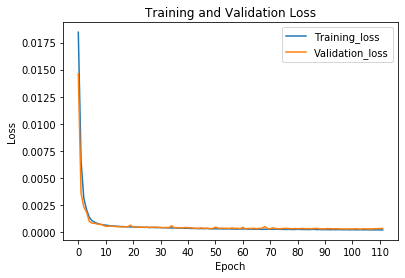

In [15]:
#plt.figure(figsize = (15,10))

plt.plot([i for i in range(len(avg_training_loss))],avg_training_loss)
plt.plot([i for i in range(len(avg_validation_loss))],avg_validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([i for i in range(0,len(avg_training_loss),10)])
plt.title('Training and Validation Loss')
plt.legend(['Training_loss','Validation_loss'])

In [15]:
#test
test_set_idx = np.load('test_set_idx.npy')
test_random_sampler = torch.utils.data.SubsetRandomSampler(test_set_idx)
test_dataloader = DataLoader(flow_dataset, batch_size = batch_size, shuffle = False,  sampler = test_random_sampler)

loss_history = []

best_model_path = [sorted([x for x in Path(model_dir).glob('*_epoch_*.pt')], key = lambda x : int(x.stem.strip('model_epoch_')))[best_model_idx]]

for model_path in best_model_path :
    hit = 0
    all_preds = []
    all_labels = []
    score = []
    
    model =  Flow_CLF(num_layers, d_model,num_heads, d_k, d_v, d_hid, add_attn_dim, pck_len, device, num_classes = num_classes, dropout = dropout).to(device)
    model = torch.nn.DataParallel(model)
    model.load_state_dict(torch.load(model_path)['state'])
    criterion = nn.CrossEntropyLoss()

    model.eval()
    with torch.no_grad():
        test_loss = 0
        for (test_x, test_y) in tqdm(test_dataloader):
            preds = model(test_x.type(torch.long).to(device))
            score.append(preds[:,1])
            loss = criterion(preds, test_y.type(torch.long).to(device))
            test_loss += loss.item()
            hit += ((preds.argmax(dim=1) == test_y.type(torch.long).to(device)).sum().item())

            all_preds.append(preds.argmax(dim=1))
            all_labels.append(test_y)

    loss_history.append(test_loss)
    accuracy = 100 * (hit/len(test_random_sampler))
    print(f'accuracy : {accuracy:.4f}')
    confusion_matrix = sklearn.metrics.confusion_matrix(torch.cat(all_labels).to('cpu'),torch.cat(all_preds).to('cpu')).ravel()
    #print(f'tn : {tn}, fp : {fp}, fn : {fp}, tp : {tp}')
    res_f1_score = f1_score(torch.cat(all_labels).to('cpu'),torch.cat(all_preds).to('cpu'))
    print(f'f1 score : {res_f1_score}')
    fpr, tpr, thresholds = roc_curve(torch.cat(all_labels).to('cpu'),torch.cat(all_preds).to('cpu'))
    print(f'fpr : {fpr}, tpr : {tpr}, threshold : {thresholds}')
    print(f'test loss : {test_loss}')

    del model


  0%|          | 0/1875 [00:00<?, ?it/s]/workspace/sy/sungyun/mdpi_IDS/Layers.py:128: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_score = self.softmax(attn2).unsqueeze(-1)
100%|██████████| 1875/1875 [03:11<00:00,  9.80it/s]


accuracy : 99.8517
f1 score : 0.9985176795856164
fpr : [0.         0.00216667 1.        ], tpr : [0.     0.9992 1.    ], threshold : [2 1 0]
test loss : 14.632340291514993


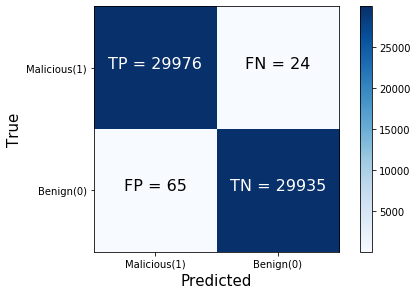

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


confusion_matrix= confusion_matrix.reshape([2,2])

con_mat = np.zeros([2,2], dtype = np.int)
con_mat[0][0] = confusion_matrix[1][1]
con_mat[0][1] = confusion_matrix[1][0]
con_mat[1][0] = confusion_matrix[0][1]
con_mat[1][1] = confusion_matrix[0][0]

plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

plt.tight_layout()
plt.colorbar()
label=["Malicious(1)", "Benign(0)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()